In [1]:
import time
import csv
from csv import reader
import pyorient
from pyArango.connection import *
from neo4j import GraphDatabase
from arango import ArangoClient
import matplotlib.pyplot as plt
import numpy as np

In [2]:
candidates = ['id.ac','ru.ac','ut.ac','acs.ac','kcu.ac']

In [3]:
with open('results_any/arangodb.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["2","3","4","5","6","7","8","9","10"])
    file.close()
with open('results_any/orientdb.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["2","3","4","5","6","7","8","9","10"])
    file.close()
with open('results_any/neo4j.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["2","3","4","5","6","7","8","9","10"])
    file.close()

In [4]:
def writedata(data,filepath):
    with open(filepath, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(data)
        file.close()

In [5]:
# Orientdb Connection
client = pyorient.OrientDB("localhost", 2424)
client.set_session_token(True)
session_id = client.connect("root", "orientdb")
client.db_open( "new", "root", "orientdb" )

In [6]:
orientResult=[]
for apex in candidates:
    orientResult.append(apex)
    for depth in range(2,11):
        start_time = time.time()
        result = client.query("SELECT $path FROM (TRAVERSE both() FROM (SELECT @rid from `apex` where name = '{}') MAXDEPTH {})".format(apex,depth),1000,"*:-1")
        time.sleep(depth*0.005)
        orientResult.append((time.time() - start_time))
    writedata(orientResult,'results_any/orientdb.csv')
    print(orientResult)
    orientResult=[]

['id.ac', 0.05088019371032715, 0.05105757713317871, 0.05445432662963867, 0.05845928192138672, 0.06535816192626953, 0.0678408145904541, 0.07269597053527832, 0.0793452262878418, 0.08330297470092773]
['ru.ac', 0.04305577278137207, 0.04769754409790039, 0.05284309387207031, 0.05868339538574219, 0.06556177139282227, 0.06766748428344727, 0.07260966300964355, 0.07735562324523926, 0.08346939086914062]
['ut.ac', 0.04284787178039551, 0.04927420616149902, 0.05309748649597168, 0.05809354782104492, 0.06252789497375488, 0.07036018371582031, 0.07592511177062988, 0.07860183715820312, 0.08411407470703125]
['acs.ac', 0.05013561248779297, 0.047045230865478516, 0.05261826515197754, 0.059160470962524414, 0.06261205673217773, 0.06685662269592285, 0.07281899452209473, 0.07762575149536133, 0.08278870582580566]
['kcu.ac', 0.043424129486083984, 0.04777240753173828, 0.05167984962463379, 0.05862712860107422, 0.06440329551696777, 0.06778073310852051, 0.0718538761138916, 0.07713675498962402, 0.08209848403930664]


In [7]:
client = ArangoClient(hosts='http://localhost:8529')
db = client.db('new', username='root', password='graphdbbenchmark')

In [8]:
arangoResult=[]
for apex in candidates:
    arangoResult.append(apex)
    for depth in range(2,11):        
        query = "FOR v,e,p IN 1..{} any 'apex/{}' GRAPH 'final' LIMIT 1000 RETURN p".format(depth,apex)
        start_time = time.time()
        db.aql.execute(query)        
        arangoResult.append((time.time() - start_time))
    writedata(arangoResult,'results_any/arangodb.csv')
    print(arangoResult)
    arangoResult=[]

['id.ac', 0.07729506492614746, 0.028634309768676758, 0.0292665958404541, 0.0396268367767334, 0.04493260383605957, 0.049063682556152344, 0.055345773696899414, 0.06535911560058594, 0.07053709030151367]
['ru.ac', 0.0186614990234375, 0.026479721069335938, 0.028432846069335938, 0.03794407844543457, 0.09533071517944336, 0.0535731315612793, 0.05519247055053711, 0.0646207332611084, 0.07204198837280273]
['ut.ac', 0.03284001350402832, 0.026192665100097656, 0.02805781364440918, 0.036932945251464844, 0.04491114616394043, 0.04979276657104492, 0.06021428108215332, 0.1173546314239502, 0.07034468650817871]
['acs.ac', 0.003841876983642578, 0.008383512496948242, 0.015240669250488281, 0.0334475040435791, 0.037612199783325195, 0.04787158966064453, 0.05147385597229004, 0.06025099754333496, 0.06660223007202148]
['kcu.ac', 0.00409698486328125, 0.004437446594238281, 0.005719423294067383, 0.010472536087036133, 0.015321969985961914, 0.01547694206237793, 0.016267061233520508, 0.01534581184387207, 0.0159716606140

In [9]:
# Neo4j Connection
uri = "neo4j://0.0.0.0:7687"
driver = GraphDatabase.driver(uri, auth=("neo4j", "test"))

In [10]:
neoResult=[]
for apex in candidates:
    neoResult.append(apex)
    for depth in range(2,11):        
        with driver.session(database='neo4j') as session:
            start_time = time.time()
            query = "MATCH p=(a:apex)-[r*1..{}]-() where a._id='apex/{}' RETURN p LIMIT 1000".format(depth,apex)
            result=session.run(query) 
            time.sleep(depth*0.007)
            neoResult.append((time.time() - start_time))            
    writedata(neoResult,'results_any/neo4j.csv')
    print(neoResult)
    neoResult=[]

['id.ac', 0.02922368049621582, 0.023982524871826172, 0.030793190002441406, 0.03791952133178711, 0.04503011703491211, 0.05201244354248047, 0.0592961311340332, 0.06641387939453125, 0.0736382007598877]
['ru.ac', 0.016613245010375977, 0.023396968841552734, 0.030368804931640625, 0.03786492347717285, 0.04483675956726074, 0.05237102508544922, 0.059301137924194336, 0.06676411628723145, 0.07363080978393555]
['ut.ac', 0.016400575637817383, 0.023490190505981445, 0.03041243553161621, 0.037702322006225586, 0.04460716247558594, 0.05190420150756836, 0.05893397331237793, 0.06675362586975098, 0.07343554496765137]
['acs.ac', 0.016275882720947266, 0.02326679229736328, 0.030336618423461914, 0.037380218505859375, 0.04416179656982422, 0.051366329193115234, 0.05867600440979004, 0.06547021865844727, 0.07251143455505371]
['kcu.ac', 0.016921281814575195, 0.023860454559326172, 0.030515670776367188, 0.03772711753845215, 0.04455852508544922, 0.05161261558532715, 0.0590054988861084, 0.06562495231628418, 0.072718381

In [11]:
neo=[]
list=[]
with open('results_any/neo4j.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    header = next(csv_reader)
    if header != None:
        for row in csv_reader:
            list.append(row)
        for i in range(1,10):
            sum = 0.0
            for row in list:
                sum = sum + float(row[i])
            neo.append(sum/5)
print(neo)

[0.019086933135986327, 0.02359938621520996, 0.03048534393310547, 0.03771882057189942, 0.044638872146606445, 0.05185332298278809, 0.05904254913330078, 0.06620535850524903, 0.07318687438964844]


In [12]:
arango=[]
list=[]
with open('results_any/arangodb.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    header = next(csv_reader)
    if header != None:
        for row in csv_reader:
            list.append(row)
        for i in range(1,10):
            sum = 0.0
            for row in list:
                sum = sum + float(row[i])
            arango.append(sum/5)
print(arango)

[0.027347087860107422, 0.018825531005859375, 0.021343469619750977, 0.03168478012084961, 0.047621726989746094, 0.0431556224822998, 0.047698688507080075, 0.06458625793457032, 0.05909953117370605]


In [13]:
orient=[]
list=[]
with open('results_any/orientdb.csv', 'r') as read_obj:
    csv_reader = reader(read_obj)
    header = next(csv_reader)
    if header != None:
        for row in csv_reader:
            list.append(row)
        for i in range(1,10):
            sum = 0.0
            for row in list:
                sum = sum + float(row[i])
            orient.append(sum/5)
print(orient)

[0.04606871604919434, 0.04856939315795898, 0.0529386043548584, 0.058604764938354495, 0.06409263610839844, 0.06810116767883301, 0.07318072319030762, 0.07801303863525391, 0.08315472602844239]


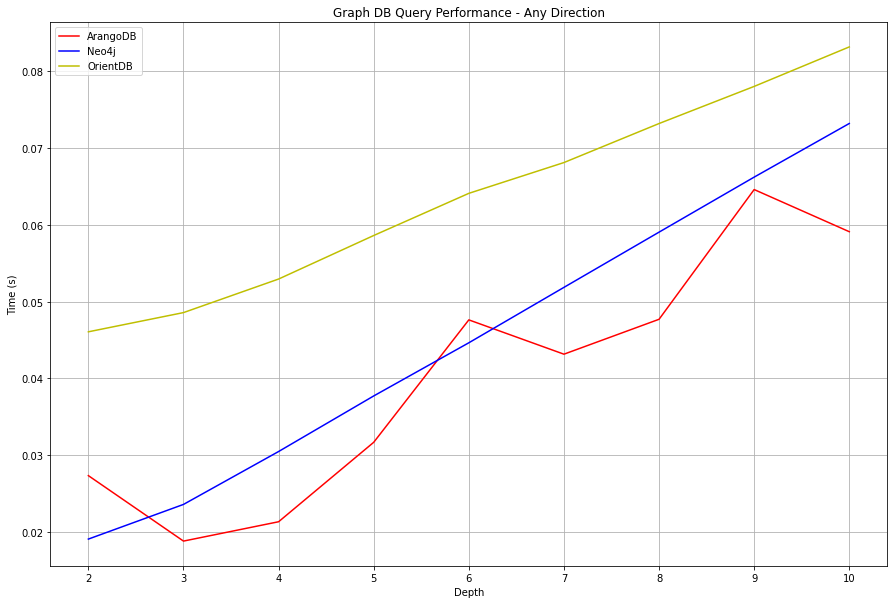

In [14]:
plt.figure(figsize=(15, 10))
plt.xlabel("Depth")
plt.ylabel("Time (s)")
plt.title("Graph DB Query Performance - Any Direction")
depth = [2,3,4,5,6,7,8,9,10]
plt.plot(depth, arango, 'r',label='ArangoDB')
plt.plot(depth, neo, 'b',label='Neo4j')
plt.plot(depth, orient, 'y',label='OrientDB')
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

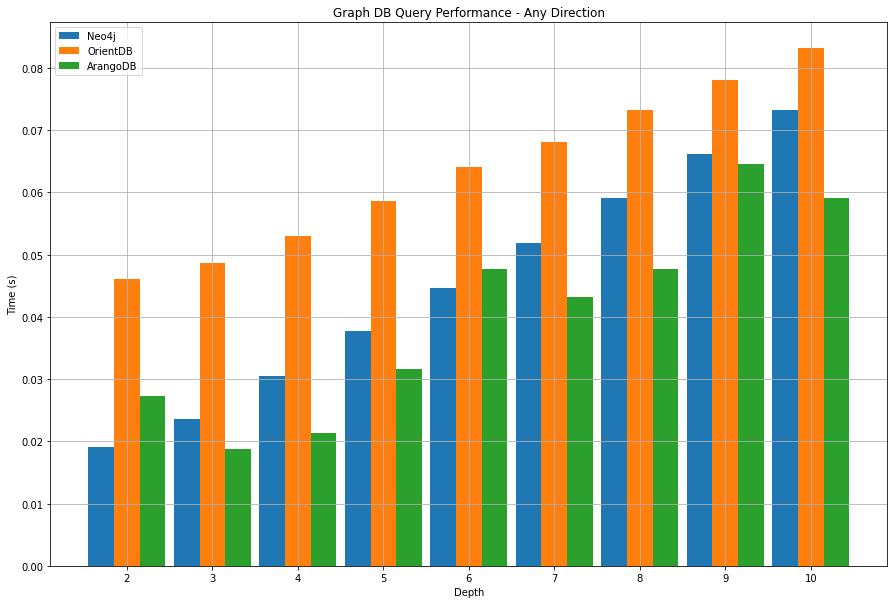

In [15]:
plt.figure(figsize=(15, 10))
w=0.3
plt.xlabel("Depth")
plt.ylabel("Time (s)")
plt.title("Graph DB Query Performance - Any Direction")
depth = [2,3,4,5,6,7,8,9,10]

bar = np.arange(len(depth))
bar1= [i+w for i in bar]
bar2= [i-w for i in bar]
plt.bar(bar2, neo, w,label='Neo4j')
plt.bar(bar, orient, w,label='OrientDB')
plt.bar(bar1, arango, w,label='ArangoDB')
plt.xticks(bar,depth)
plt.legend(loc="upper left")
plt.grid(True)
plt.show()